In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import platform
from matplotlib import font_manager, rc 
import matplotlib
# '-' 부호가 제대로 표시되게 하는 설정 
matplotlib.rcParams['axes.unicode_minus'] = False
# 운영 체제마다 한글이 보이게 하는 설정 # 윈도우
if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name() 
    rc('font', family=font_name)
#맥
elif platform.system() == 'Darwin': 
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons 
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, MeanShift

## 선형회귀
지도학습에서 종속변수가 숫자일 경우(예 아이스아메리카노)  
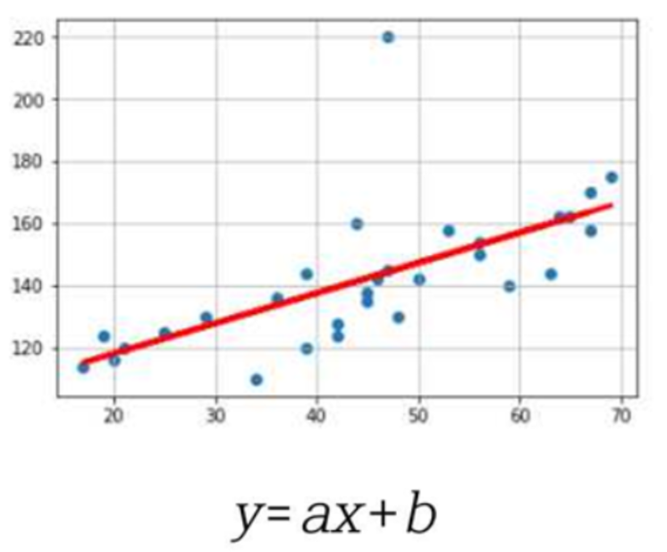

선형회귀 모델을 포함한 머신러닝 모델에서는 예측값과 실제값과의 차이가 존재.  
즉, 오차를 줄이는 방향으로 모델을 최적화 하는것이 목표  
모델의 예측값과 실제값과의 차이, 즉 오차로부터 손실함수를 계산  
**손실함수로 MSE를 주로 사용**  
y = ax + b   
a : 기울기  
b : 편향(bias, 위치) 절편  

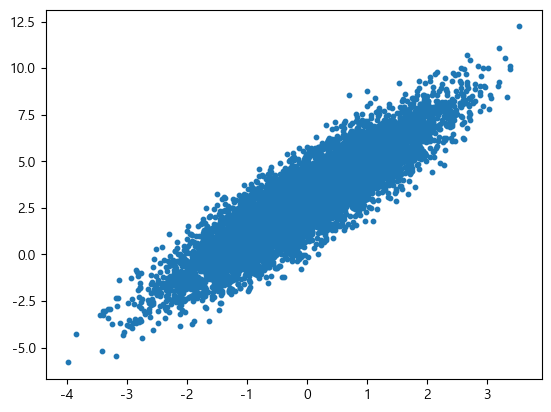

In [9]:
n_samples = 10000
x = np.random.randn(n_samples)

#기울기와 절편
w = 2
b = 3

y = w*x + b + np.random.randn(n_samples)
plt.scatter(x, y, s =10 )



In [11]:
np.corrcoef(x,y)

array([[1.        , 0.89304918],
       [0.89304918, 1.        ]])

## 상관계수
### 값이 크면 좋은것(관계 잘 설명 O), 작으면 나쁜것(관계설명 X)
### 두 변수 관련성 &uparrow;  &rightarrow; 상관계수는 1에 가깝다
### 두 변수 관련성 &downarrow;  &rightarrow; 상관계수는 0에 가깝다

In [15]:
from sklearn.linear_model import LinearRegression
leg = LinearRegression()
leg.fit(x.reshape(-1, 1), y)
print(leg.coef_) #기울기
print(leg.intercept_) #y절편(위치, 편향성)

[1.98839768]
2.97917576176066


In [12]:
x

array([-0.14375308,  1.02347482, -0.35985602, ..., -0.6869965 ,
       -0.70249837,  1.70954098])

In [13]:
x.reshape(-1, 1)

array([[-0.14375308],
       [ 1.02347482],
       [-0.35985602],
       ...,
       [-0.6869965 ],
       [-0.70249837],
       [ 1.70954098]])

### y = ax + b   
### a : 기울기  
### b : 편향(bias, 위치) 절편 
## 독립변수 x1,x2 predictor, 종속 변수 y

In [34]:
n_samples = 200
x1 = np.random.randn(n_samples)
x2 = np.random.randn(n_samples)


y = 2*x1 + 3*x2 + 4 + np.random.randn(n_samples) #독립변수 x1,x2 predictor
leg = LinearRegression()
X = pd.DataFrame({"x1":x1, "x2":x2})

leg.fit(X, y) # fit함수로 모델을 훈련하고 나면 predictor 함수를 사용해 예측
print(leg.coef_) #기울기
print(leg.intercept_) #y절편(위치, 편향성)

[1.98209837 2.9591496 ]
3.895529447797786


In [35]:
leg.score(X,y) #score = 정확도

0.9139219975325963

### score : 해당 X, y 값에 대한 정확도를 출력
### 종속변수와 독립변수와의 상관도 높은 수록 값은 1에 가까워진다.
### 모델의 학습 속도를 높이기 위해서 실제로는 오차 자체를 줄이는 것이 아니라
### 오차로부터 계산된 손실함수(loss ft)을 정의하고 이를 줄이는 방향으로 모델을 학습
### 회귀분석에서 주로 사용되는 손실 함수는 오차 자승의 합 평균치 MSE(Mean Square Error)
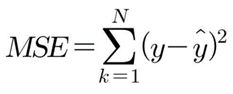

### 머신러닝이란 손실함수를 줄이는 방향으로 모델의 파라미터를 조정하는작업(최적화 : Opimizer) 
### 최적화 : 모델 예측 값이 실제값을 최대한 잘 맞추도록 파라미터 최적화

## 회귀직선
### 붓꽃의 꽃잎길이 예측
- 꽃받침의 길이를 보고 꽃잎의 길이를 예측  
### 몸무게 예측

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split

In [38]:
from sklearn import datasets
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [40]:
print(iris.feature_names) # sepal : 꽃받침, petal : 꽃잎

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [61]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_data = iris.data
iris_label = iris.target

print("iris.target값:" ,iris_label[[0, 50, 100]])
print("iris.target명:" ,iris.target_names)

iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)
iris_df["label"] = iris.target
iris_df

iris.target값: [0 1 2]
iris.target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [62]:
X_all = iris.data
X_all[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [64]:
X = X_all[:,0] # sepal length 전체
y = X_all[:,2] # petal length 전체

print(X[0:3])
print(y[0:3])

[5.1 4.9 4.7]
[1.4 1.4 1.3]


**(중요)**
## 훈련(Training)
모델이 데이터를 이용하여 학습하는 과정을 훈련  
최적화 알고리즘에 의해 파라미터(가중치등)를 계속 갱신하여 모델의 예측 값이 실제값에 수렴하도록 학습  
①model.predict(X_test): X_test 예측  
②train_test_split(X, y, test_size = 0.2, random_state = 7)  
train_test_split : 주어진 데이터와 랜덤값을 바탕으로 학습 데이터와 테스트 데이터를 리턴한다.  
좀더 쉽계 얘기하면 훈련과 테스트를 나누어 먼저 random seed를 7로 하고 섞는다.  
훈련용 데이터(0.8)와 데스트용 데이터(0.2)를 0.8:0.2로 나눈다.

## train_test_split : 주어진 데이터와 랜덤값을 바탕으로 학습데이터와 테스트데이터를 리턴한다.  훈련과 테스트를 나누어  훈련 데이터의 분포   
### test_size: 학습 데이터셋의 비율(float)이나 개수(int) (default = test_size의 나머지)  
### random_state: 데이터 분할시 셔플이 이루어지는데 이를 위한 시드값(int나 RandomState로 입력)

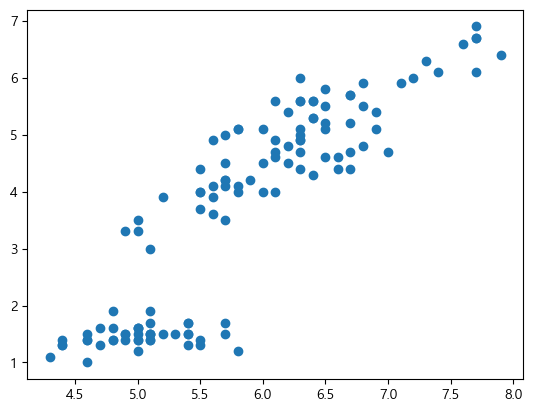

In [68]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 7)
plt.scatter(X_train, y_train, marker = "o") #train 훈련값

### 모델구축
### 선형 모델인 LinearRgression 는 손실함수로 MSE를 사용하여 경사하강법의 최적화 알고리즘을 사용하는 1차 선형모델

### 경사하강법
- 가장 일반적인 최적화 알고리즘 : 경사하강법(Gradient Descent)
- 손실함수를 계수에 관한 그래프로 그렸을때 최소값으로 빨리 도달하기위해서는  
현재 위치에서의 기울기(미분값)에 비례하여 반대방향으로 이동하는 방식
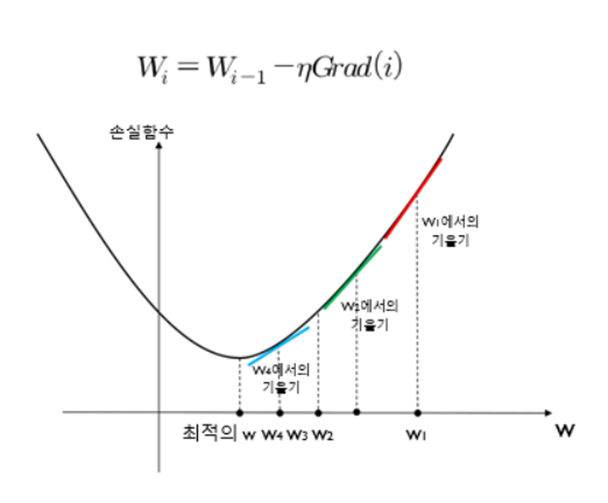

### sklearn LinearRgression 사용법
from sklearn.linear_model import LinearRegression  
LinearRgression 모델을 생성하고, 그 안에 X, y 데이터를 fit 시킨다.  
fit()메소드는 선형회귀 모델에 필요한 2가지 변수를 전달  
기울기 : line_fitter.coef_  
절편 : 기울기 : line_fitter.intercept_  

In [69]:
print(X_train)

[6.2 5.7 4.6 6.9 6.4 4.8 5.5 5.4 5.1 7.1 6.7 6.8 6.4 6.5 5.7 5.  6.7 6.
 6.4 4.7 4.6 5.1 7.7 4.3 6.3 5.5 5.  6.5 5.  4.4 5.  6.7 7.3 5.5 5.2 5.7
 7.2 5.4 5.8 6.1 5.7 4.8 6.5 4.6 6.6 6.7 6.1 5.7 7.  4.7 6.5 7.7 4.9 4.8
 5.5 5.6 6.4 5.2 7.9 5.8 5.7 5.1 5.1 5.  7.7 7.6 5.  5.4 6.7 6.1 6.3 7.4
 5.  5.4 5.4 5.6 4.9 5.3 6.  6.8 6.2 5.7 6.3 4.9 6.9 5.  4.4 6.  6.1 6.4
 4.9 5.6 5.9 6.3 6.8 5.5 6.3 4.8 6.3 5.6 5.1 5.1 4.6 5.7 6.6 5.1 7.7 6.1
 6.2 6.3 4.4 6.5 5.5 6.3 5.1 5.8 5.8 6.3 5.8 5. ]


In [77]:
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(X_train.reshape(-1,1), y_train)
print("Score : {:.3f}".format(linr.score(X_train.reshape(-1,1), y_train)))

Score : 0.776


In [80]:
print(linr.coef_)
print(linr.intercept_)

[1.8699969]
-7.233315234253802


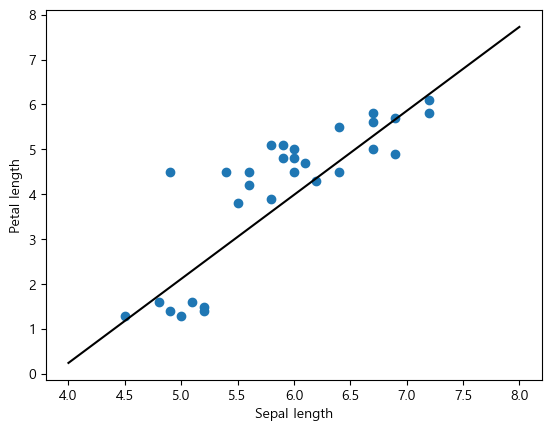

In [84]:
plt.scatter(X_test, y_test, marker = "o") #test 예측값

plt.xlabel("Sepal length")
plt.ylabel("Petal length")

XX = np.linspace(4, 8, 10000)
plt.plot(XX, linr.coef_*XX + linr.intercept_, "k-")

### 몸무게 예측
### 가상의 샘플 데이터를 사용하여 키로부터 몸무게를 예측

(array([ 8., 17., 21., 19., 25., 26., 50., 58., 65., 83., 83., 79., 81.,
        83., 70., 42., 53., 38., 35., 22., 16.,  5., 12.,  6.,  1.,  0.,
         1.,  0.,  0.,  1.]),
 array([54.56845671, 55.02628864, 55.48412057, 55.9419525 , 56.39978443,
        56.85761636, 57.31544829, 57.77328022, 58.23111215, 58.68894408,
        59.14677601, 59.60460794, 60.06243987, 60.52027181, 60.97810374,
        61.43593567, 61.8937676 , 62.35159953, 62.80943146, 63.26726339,
        63.72509532, 64.18292725, 64.64075918, 65.09859111, 65.55642304,
        66.01425497, 66.47208691, 66.92991884, 67.38775077, 67.8455827 ,
        68.30341463]),
 <BarContainer object of 30 artists>)

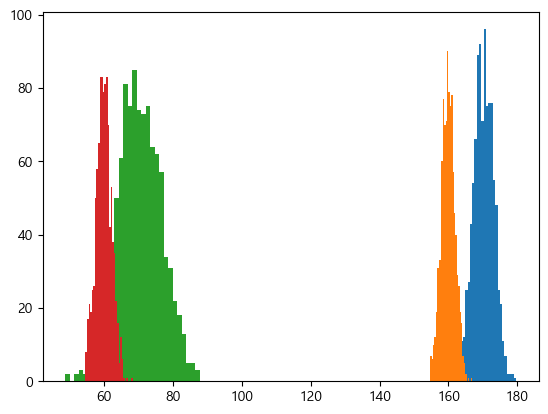

In [91]:
n_samples = 1000
x1 = 3*np.random.randn(n_samples) + 170
x2 = 2*np.random.randn(n_samples) + 160


y1 = 2*x1-270 + 2*np.random.randn(n_samples) # 평균 70kg
y2 = 1*x2-100 + np.random.randn(n_samples) # 평균 60kg

plt.hist(x1, bins = 30)
plt.hist(x2, bins = 30)


plt.hist(y1, bins = 30)
plt.hist(y2, bins = 30)





In [92]:
X_train, X_test, y_train, y_test = train_test_split (x1, y1, test_size = 0.2, random_state = 7) # x1 남자키 y1 남자 몸무게
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)
print(leg1.coef_)
print(leg1.intercept_)
print("Score : {:.3f}".format(leg1.score(X_train.reshape(-1,1), y_train)))

[2.03390912]
-275.77434610270774
Score : 0.897


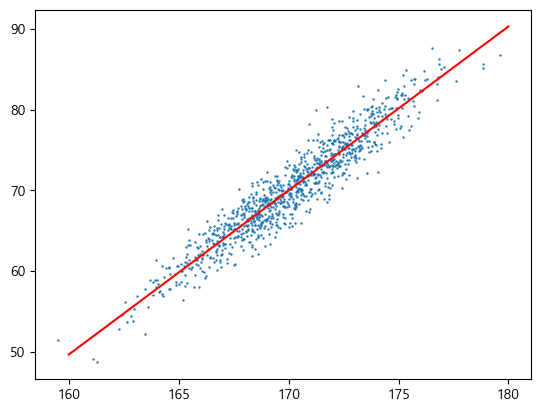

In [93]:
xs = np.linspace(160,180,3)
ys = xs*leg1.coef_[0] + leg1.intercept_
plt.scatter(x1,y1, s = 0.5)
plt.plot(xs, ys, c = 'r')

In [105]:
X_train, X_test, y_train, y_test = train_test_split (x2, y2, test_size = 0.2, random_state = 7) # x1 남자키 y1 남자 몸무게
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)
print(leg1.coef_)
print(leg1.intercept_)
print("Score : {:.3f}".format(leg1.score(X_test.reshape(-1,1), y_test)))

[1.00567532]
-100.93333741288326
Score : 0.740


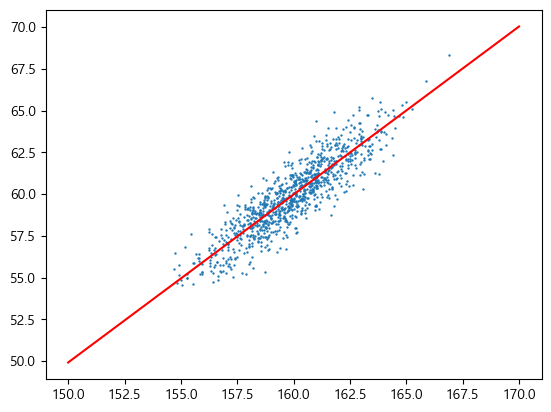

In [97]:
xs = np.linspace(150,170,3)
ys = xs*leg1.coef_[0] + leg1.intercept_
plt.scatter(x2,y2, s = 0.5)
plt.plot(xs, ys, c = 'r')

In [103]:
x = np.concatenate((x1, x2))
y = np.concatenate((y1, y2))
X_train, X_test, y_train, y_test = train_test_split (x, y, test_size = 0.2, random_state = 7) # x1 남자키 y1 남자 몸무게
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)
print(leg1.coef_)
print(leg1.intercept_)
print("Score : {:.3f}".format(leg1.score(X_test.reshape(-1,1), y_test)))

[1.14745876]
-124.27660073659618
Score : 0.870


In [99]:
print(x)
print(y)

[168.57024211 173.19491213 169.61807968 ... 160.78032066 158.51739558
 156.82440074]
[66.98269346 76.11057432 68.46636741 ... 62.47421335 57.86205653
 57.35493225]


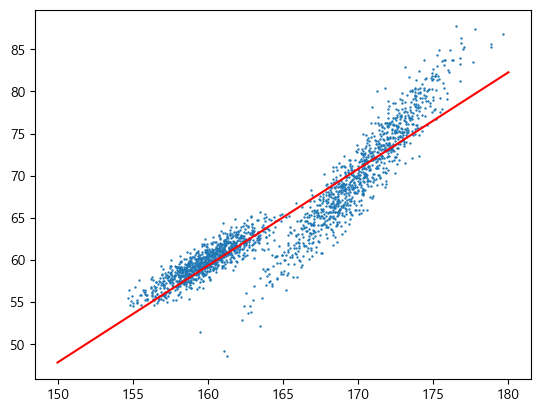

In [100]:
xs = np.linspace(150,180,3)
ys = xs*leg1.coef_[0] + leg1.intercept_
plt.scatter(x,y, s = 0.5)
plt.plot(xs, ys, c = 'r')

In [101]:
# 성별을 컬럼에 추가하여 회귀분석을 하면 성능이 조금 개선?
X1 = pd.DataFrame({"height":x1, "sex":0})
X2 = pd.DataFrame({"height":x2, "sex":1})

X = pd.concat([X1, X2], ignore_index = True)
X

,height,sex
0,168.570242,0
1,173.194912,0
2,169.618080,0
3,172.984219,0
4,171.402011,0
...,...,...
1995,157.493966,1
1996,160.011153,1
1997,160.780321,1
1998,158.517396,1


In [104]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 7) # x1 남자키 y1 남자 몸무게
leg1 = LinearRegression()
leg1.fit(X_train, y_train)
print(leg1.coef_)
print(leg1.intercept_)
print("Score : {:.3f}".format(leg1.score(X_test, y_test)))

[1.70181182 7.01870608]
-219.26486668782397
Score : 0.920


### 결과를 보면 1.70키 + 7.01성별 - 219로 선형 모델을 구성, score = 0.920

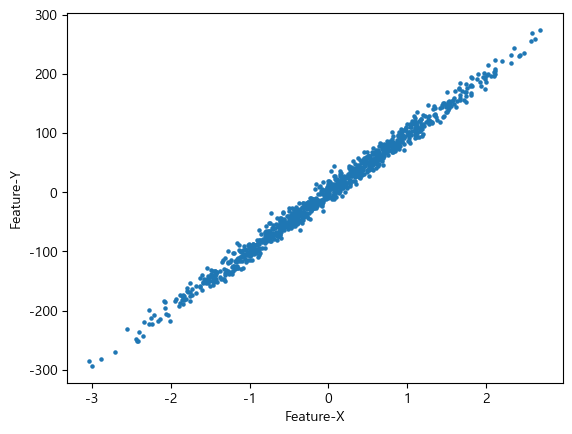

In [167]:
from sklearn.datasets import make_regression   # make_regression() 함수를 사용해서 선형으로 분산된 데이터를 생성

X, Y = make_regression(n_features = 1,noise=10, n_samples = 1000 ) #noise : 직선(예측)과의 편차
plt.xlabel("Feature-X")
plt.ylabel("Feature-Y")
plt.scatter(X, Y, s = 5)

In [168]:
lr = LinearRegression()
lr.fit(X, Y)
print(lr.coef_)
print(lr.intercept_)
print(lr.score(X,Y))

[97.84767398]
0.034880328546636793
0.9900463403351577


In [169]:
pred = lr.predict(X)

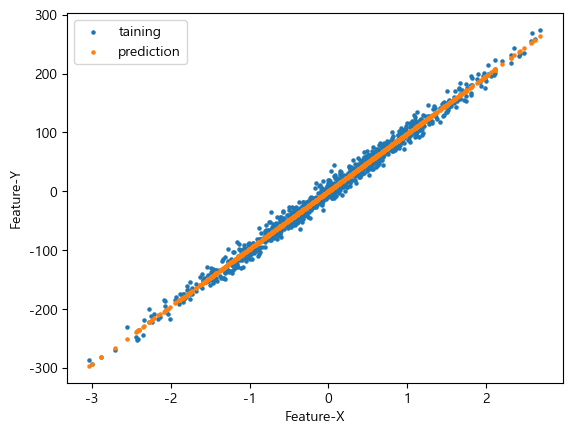

In [177]:
plt.scatter(X,Y,s = 5, label = "taining")
plt.scatter(X,pred,s = 5, label = "prediction")


plt.xlabel("Feature-X")
plt.ylabel("Feature-Y")
plt.legend()

### 파란색 점은 실제 데이터를 나타내고, 주황색 점은 예측 데이터
### 머신러닝 모델이 훈련데이터에 너무 충실하여 일반성이 떨어짐
### 이를 과대적합 ==> 단순화 필요
### 랏지회귀는 계수의 크기에 패널티

In [178]:
from sklearn.linear_model import LinearRegression, Ridge

In [179]:
ridge = Ridge(alpha=1)
lr = LinearRegression()
ridge.fit([[0,0], [0,0], [1,1]],[0,.1 ,1])
lr.fit([[0,0], [0,0], [1,1]],[0,.1 ,1])

LinearRegression()

In [180]:
ridge.coef_

array([0.27142857, 0.27142857])

In [181]:
lr.coef_

array([0.475, 0.475])

In [182]:
Y

array([-4.39546714e+01, -1.24084618e+02, -3.34775766e+01, -5.78171515e+01,
       -1.19259211e+02, -5.54085820e+01,  1.91393523e+02,  5.50142948e+01,
       -1.61544735e+02,  1.57700354e+01, -1.06456691e+02, -4.89976752e+01,
       -5.57942447e+01,  2.68800622e+02,  1.95706196e+01,  6.16864176e+01,
       -2.37112429e+01, -2.15869655e+01,  8.56325674e+01,  8.16510979e+01,
        2.59120213e+02, -7.27135342e+01, -8.51930122e+01,  4.89130949e+01,
       -8.89198822e+01,  1.95213415e+02,  1.53110944e+02,  1.03356978e+02,
        5.29962223e+01,  1.00854571e+02,  2.82738807e+01,  9.57588036e+01,
       -1.62438626e+01, -1.79882621e+02,  8.91722809e+00,  1.19435594e+02,
        2.31604872e+02, -8.72388729e+01, -3.97553753e+01, -1.46454335e+02,
       -4.30433476e+01, -1.66238211e+01,  1.29942807e+02,  4.18783857e+01,
       -2.63435443e+01,  3.88027644e+01, -4.40313702e+01, -7.43839553e+01,
       -3.99936774e+01, -6.23893802e+01, -5.45735329e+01,  1.91141080e+01,
       -4.69981434e+01, -

In [127]:
outliers = Y[950:] - 600
outliers

array([-598.87810043, -591.78249356, -599.04100645, -508.69605827,
       -649.74468497, -590.63456021, -596.59590791, -685.26304175,
       -759.16611416, -694.19839239, -593.41465747, -642.97959869,
       -630.37897444, -636.70652483, -625.22808885, -677.13804186,
       -608.84408177, -536.4389219 , -619.78937898, -521.21037038,
       -589.40947091, -551.45673966, -624.81924411, -594.18869292,
       -691.88369169, -618.00136503, -615.45854432, -619.16404828,
       -622.08083981, -641.70154307, -647.51168141, -677.36672217,
       -562.23554348, -630.42529415, -568.10538042, -621.46643286,
       -578.48351276, -641.92101435, -628.55354133, -503.99317277,
       -652.86875278, -646.27423091, -681.91801483, -578.8315206 ,
       -613.93152268, -732.65477397, -551.39425763, -533.86979385,
       -572.49078623, -578.20063223])

In [183]:
Y_Out = np.append(Y[:950],outliers)
Y_Out

array([-4.39546714e+01, -1.24084618e+02, -3.34775766e+01, -5.78171515e+01,
       -1.19259211e+02, -5.54085820e+01,  1.91393523e+02,  5.50142948e+01,
       -1.61544735e+02,  1.57700354e+01, -1.06456691e+02, -4.89976752e+01,
       -5.57942447e+01,  2.68800622e+02,  1.95706196e+01,  6.16864176e+01,
       -2.37112429e+01, -2.15869655e+01,  8.56325674e+01,  8.16510979e+01,
        2.59120213e+02, -7.27135342e+01, -8.51930122e+01,  4.89130949e+01,
       -8.89198822e+01,  1.95213415e+02,  1.53110944e+02,  1.03356978e+02,
        5.29962223e+01,  1.00854571e+02,  2.82738807e+01,  9.57588036e+01,
       -1.62438626e+01, -1.79882621e+02,  8.91722809e+00,  1.19435594e+02,
        2.31604872e+02, -8.72388729e+01, -3.97553753e+01, -1.46454335e+02,
       -4.30433476e+01, -1.66238211e+01,  1.29942807e+02,  4.18783857e+01,
       -2.63435443e+01,  3.88027644e+01, -4.40313702e+01, -7.43839553e+01,
       -3.99936774e+01, -6.23893802e+01, -5.45735329e+01,  1.91141080e+01,
       -4.69981434e+01, -

In [184]:
X

array([[-4.91531274e-01],
       [-1.16079603e+00],
       [-3.33746095e-01],
       [-5.67823148e-01],
       [-1.27278660e+00],
       [-5.22901230e-01],
       [ 1.98841642e+00],
       [ 6.35336763e-01],
       [-1.78735858e+00],
       [ 1.11276543e-01],
       [-1.08164475e+00],
       [-3.50513528e-01],
       [-5.77585466e-01],
       [ 2.58432231e+00],
       [ 1.82026178e-01],
       [ 5.09119897e-01],
       [-7.61480033e-02],
       [-1.68242153e-01],
       [ 7.81987792e-01],
       [ 7.42344514e-01],
       [ 2.61770595e+00],
       [-7.11500770e-01],
       [-8.07647231e-01],
       [ 5.57952602e-01],
       [-1.01767061e+00],
       [ 1.81272917e+00],
       [ 1.74882376e+00],
       [ 9.33481139e-01],
       [ 4.44033529e-01],
       [ 9.92993190e-01],
       [ 3.32709804e-01],
       [ 9.37682247e-01],
       [-1.98490348e-01],
       [-1.81136891e+00],
       [ 4.02332923e-02],
       [ 1.28384393e+00],
       [ 2.32019571e+00],
       [-1.00732737e+00],
       [-2.7

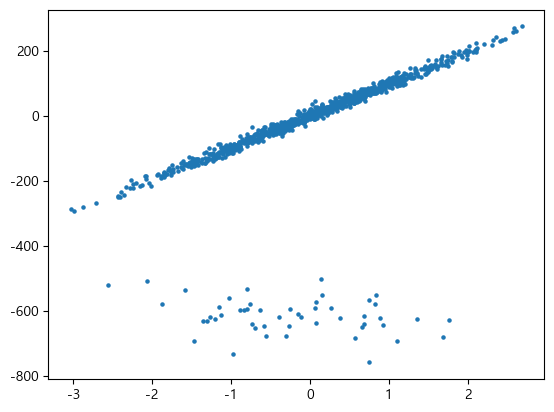

In [185]:
plt.scatter(X, Y_Out, s= 5)

In [186]:
lr = LinearRegression()
lr.fit(X, Y_Out)

LinearRegression()

In [187]:
pred_Out = lr.predict(X)

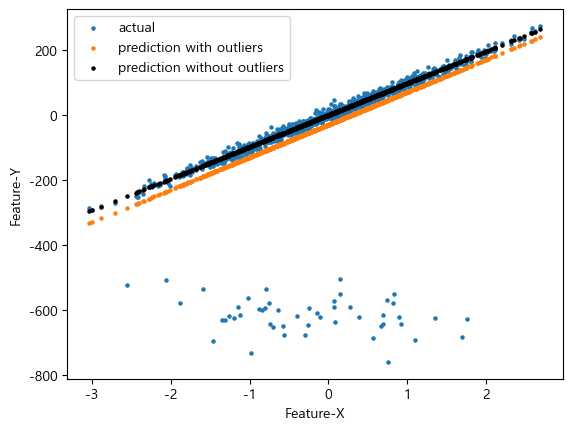

In [188]:
plt.scatter(X, Y_Out, s = 5, label = "actual")
plt.scatter(X, pred_Out, s = 5, label = "prediction with outliers")
plt.scatter(X, pred, s = 5, c = 'k' , label = "prediction without outliers")


plt.xlabel("Feature-X")
plt.ylabel("Feature-Y")
plt.legend()

In [189]:
lr.coef_

array([100.0965903])

In [190]:
ridge = Ridge(alpha = 1000) #alpha 값이 커질수록 직선의 기울기가 0에 가까워지면서 평균 기준 모델과 비슷해진다
ridge.fit(X, Y_Out)
pred_ridge = ridge.predict(X)

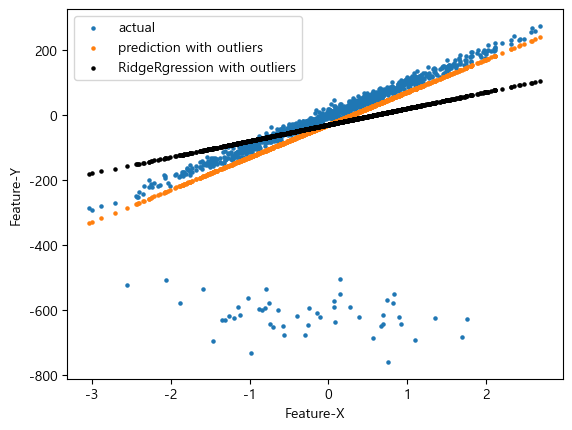

In [191]:
plt.scatter(X, Y_Out, s = 5, label = "actual")
plt.scatter(X, pred_Out, s = 5, label = "prediction with outliers")
plt.scatter(X, pred_ridge, s = 5, c = "k", label = "RidgeRgression with outliers")

plt.xlabel("Feature-X")
plt.ylabel("Feature-Y")
plt.legend()

## 하이퍼파라미터 알파
모델링 할때 사용자가 직접 세팅해주는 값  
하이퍼파라미터가 필요한 이유: 데이터는 여러가지가 존재하고, 비슷한 종류의 데이터라고 하더라도 분포들이 다양  
데이터들의 특성들에 따라서 여러 요소들을 적절한 값을 설정해야하고 최고의 예측 성능을 가져올 수 있다.  
하이퍼파라미터를 적절한 값으로 설정하면 인공지능 알고리즘 모델의 과적합 문제 해결에 도움을 준다.

In [192]:
X, y, w = make_regression(n_samples = 10, n_features = 10, coef = True,
                         random_state = 1, bias = 3.5)

In [193]:
w

array([80.71051956, 10.74941291, 38.78606441, 13.64552257,  5.99176895,
       86.35418546, 12.13434557,  4.45518785, 74.71216427, 55.6240234 ])

In [194]:
alphas = np.logspace(-6,6,200) # 로그 스케일 값으로 배열 생성, 200:멤버개수
alphas[:20]

array([1.00000000e-06, 1.14895100e-06, 1.32008840e-06, 1.51671689e-06,
       1.74263339e-06, 2.00220037e-06, 2.30043012e-06, 2.64308149e-06,
       3.03677112e-06, 3.48910121e-06, 4.00880633e-06, 4.60592204e-06,
       5.29197874e-06, 6.08022426e-06, 6.98587975e-06, 8.02643352e-06,
       9.22197882e-06, 1.05956018e-05, 1.21738273e-05, 1.39871310e-05])

In [195]:
coefs = []
for a in alphas:
    ridge = Ridge(alpha = a, fit_intercept = False)
    ridge.fit(X,y)
    coefs.append(ridge.coef_)
coefs

[array([81.14275278, 13.26238543, 40.30670072, 13.14113341,  5.60345304,
        84.64767451, 12.73562999,  6.36130448, 74.82723569, 59.02490452]),
 array([81.1427144 , 13.26235749, 40.3066926 , 13.1411389 ,  5.60344273,
        84.64762813, 12.73563448,  6.36127822, 74.82721159, 59.02494403]),
 array([81.1426703 , 13.26232539, 40.30668327, 13.14114521,  5.60343089,
        84.64757484, 12.73563964,  6.36124805, 74.82718391, 59.02498942]),
 array([81.14261963, 13.26228852, 40.30667255, 13.14115246,  5.60341728,
        84.64751362, 12.73564557,  6.36121339, 74.82715209, 59.02504157]),
 array([81.14256141, 13.26224615, 40.30666023, 13.14116079,  5.60340165,
        84.64744327, 12.73565238,  6.36117356, 74.82711554, 59.02510148]),
 array([81.14249452, 13.26219746, 40.30664607, 13.14117036,  5.60338368,
        84.64736245, 12.73566021,  6.36112781, 74.82707355, 59.02517032]),
 array([81.14241767, 13.26214153, 40.30662981, 13.14118136,  5.60336305,
        84.64726959, 12.7356692 ,  6.36

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

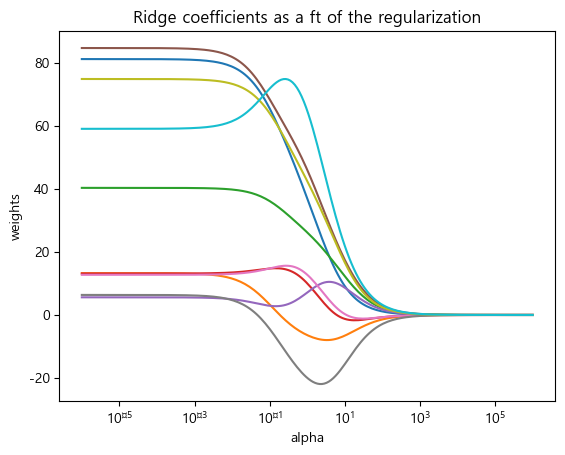

In [196]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")

plt.title("Ridge coefficients as a ft of the regularization")
plt.show()

## 선형분류
### 붓꽃 이진 분류
### 꽃받침의 길이와 너비를 보고 붓꽃의 종류를 분류
### setosa, non-setosa로 분류

In [197]:
from sklearn.datasets import load_iris
iris = load_iris()

In [198]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [199]:
X = iris.data
y = iris.target

print(X.shape, type(X))
print(y.shape, type(y))

(150, 4) <class 'numpy.ndarray'>
(150,) <class 'numpy.ndarray'>


In [200]:
print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [201]:
X2 = X[:,:2]
X2

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

Text(0, 0.5, 'sepal width')

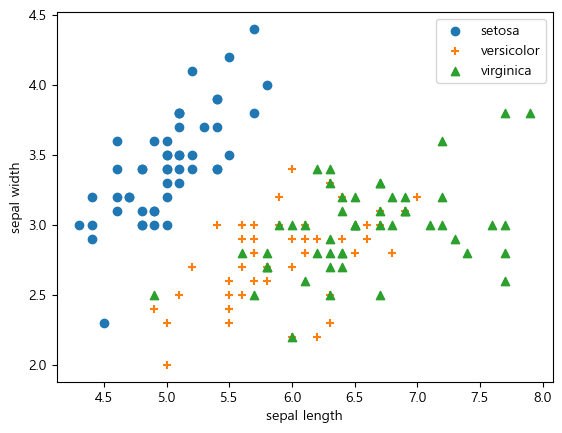

In [202]:
marker = ["o","+","^"]
for i in range(3):
    xs = X2[:, 0][y == i]  #꽃받침 길이
    ys = X2[:, 1][y == i]  #꽃받침 너비
    plt.scatter(xs,ys, marker = marker[i])

plt.legend(iris.target_names)
plt.xlabel("sepal length")
plt.ylabel("sepal width")

In [203]:
y2 = y.copy()
y2[(y2 == 2)] = 1 #y2중에 2의 값을 모두 1로 변경, setosa, non-setosa로 분류
y2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### 데이터를 훈련데이터와 테스트 데이터로 나누어 사용

In [206]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.5)

Text(0, 0.5, 'sepal width')

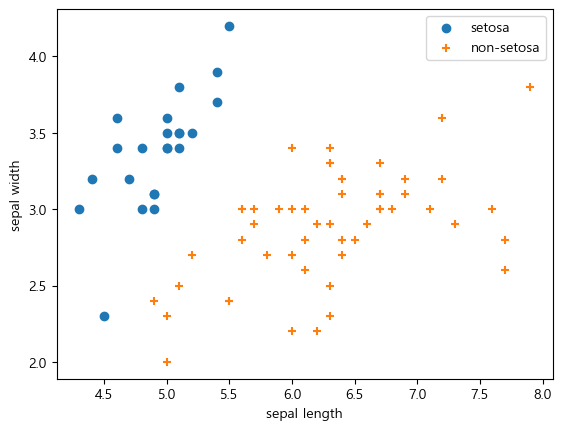

In [208]:
marker = ["o","+","^"]
for i in range(3):
    xs = X_train[:, 0][y_train == i]  #꽃받침 길이
    ys = X_train[:, 1][y_train == i]  #꽃받침 너비
    plt.scatter(xs,ys, marker = marker[i])

binary_names = ["setosa", "non-setosa"]
    
plt.legend(binary_names)
plt.xlabel("sepal length")
plt.ylabel("sepal width")

### 학습을 하기위해서 최적화 알고리즘을 선택
가장 널리 사용되는 경사하강법  
경사하강법은 모든 데이터셋의 모델을 학습시켜서 예측 정확성은 높으나 오랜시간이 걸림

## 확률적경사하강법(Stochastic Gradient Descent : SGD)
### 랜덤으로 단 한개의 데이터를 추출하여 
### 기울기를 얻어내는 과정을 반복 학습하여 최적점을 찾아냄

In [211]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(max_iter = 1000)
clf.fit(X_train, y_train)

SGDClassifier()

In [212]:
print(clf.coef_)
print(clf.intercept_)

[[ 115.07191995 -178.86178862]]
[-57.25664899]


## 선형분류
분류에서는 손실함수로 MSE를 사용할 수 없다.   회귀분석에서 손실함수로 MSE 많이 사용
--
대신, 분류에서 정확도(accuracy)를 손실함수로 사용할 수 있다
-- 
회귀분석에서 손실함수로 MSE 많이 사용
-- 
분류에서는 손실함수로 정확도 사용   
-- 
예를 들어 남녀 각각 50명씩 100명에 대해 남녀 분류를 시도하였으나  
96명을 맞추고 4명을 틀렸다면 정확도는 0.96이다. 그러나 정확도를 손실함수로 사용하는데에는 다음과 같은 문제가 있다    

### 카테고리 분포 불균형시 문제
남자가 95명, 여자가 5명이 있는 그룹에서 남자는 1명을 잘 못 분류하  
고 여자는 3명을 잘 못 분류했다고 하면, 정확도는 여전히 0.96이다  
손실을 제대로 측정하지 못한다!    
## ==> 이를 보완하기 위해서 크로스 엔트로피(cross entropy)를 사용한다.

### 1차 선형판별식에서 X는 꽃받침의 길이, y는 꽃받침의 너버
### ax+by+c>0  = > y >(-a/b)x - c/b

### 결정경계

In [213]:
a = clf.coef_[0,0]
b = clf.coef_[0,1]
c = clf.intercept_
print(a,b,c)

115.07191994996832 -178.86178861788568 [-57.25664899]


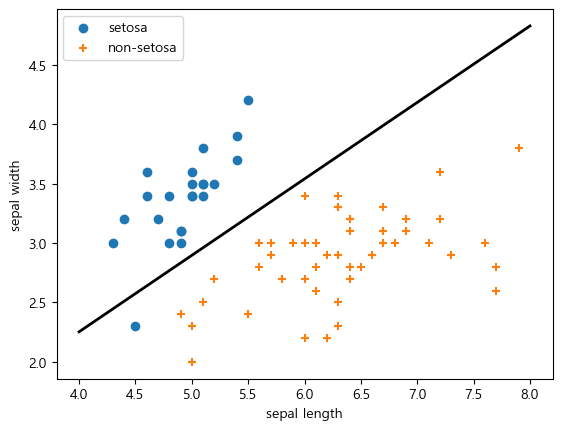

In [215]:
marker = ["o","+","^"]
for i in range(3):
    xs = X_train[:, 0][y_train == i]  #꽃받침 길이
    ys = X_train[:, 1][y_train == i]  #꽃받침 너비
    plt.scatter(xs,ys, marker = marker[i])

binary_names = ["setosa", "non-setosa"]
    
plt.legend(binary_names)
plt.xlabel("sepal length")
plt.ylabel("sepal width")

XX = np.linspace(4,8, 40)
plt.plot(XX, (-a/b)*XX - c/b, "k-", linewidth =2)

훈련(Training) 데이터 – 모델 파라미터를 훈련하는데 사용  
검증(Validation) 데이터 – 과대적합이나 과소적합을 검사하고 최적 모델 구조(하이퍼파라미터 등)를 찾는데 사용  
테스트(Test) 데이터 – 모델의 성능을 최종적으로 테스트 하는데 사용

### K-교차 검증

주어진 데이터 전체를 골고루 검증용으로 사용하여 모델의 동작을 보다 정교하게 확인하기 위함. 보통 K는 5~10을 주로 사용
사이킷런에서는 cross_val_score() 함수가 교차검증을 자동으로 수행하고 성능도 평가한다.

### k-NN(k-nearest neighbor) 알고리즘

주어진 샘플의 특성 값을 보고 가장 가까운 특성을 가지는 이웃(neighbor)을 k개 선택하고 이들 레이블의 평균치로 이 샘플이 속할 분류를 예측하는 방식  
kNN은 직관적으로 이해하기 쉬운 분류 알고리즘으로서 추천시스템에서 많이 사용된다   

적절한 추천을 위해 추천을 요청한 사람의 유사한 K명의 사람들이 좋아는 품목을 추천하는 방식   
k를 너무 작게 잡으면 노이즈에 민감하지만 정확도는 상승  
k를 크게 잡으면 노이즈에 강하나 정확도는 예측 어렵다

### 로지스틱회귀
임의 범위를 갖는 값으로 부터 0과 1사이의 값을 예측하거나 이진 분류에 사용하는 알고리즘

In [218]:
pass_time = [8,9, 9, 9.5, 10, 12, 14, 14.5, 15, 16, 16, 16.5, 17, 17, 17, 17.5,20, 20, 20] # 합격자 공부시간
fail_time = [1, 2, 2.1,2.6,2.7,2.8,2.9, 3,3.2,3.4,3.5,3.6,3, 5,5.2,5.4]  #불합격자 공부시간

In [219]:
X = np.hstack((pass_time, fail_time)) #두 배열을 왼쪽에서 오른쪽으로 합치기 
X

array([ 8. ,  9. ,  9. ,  9.5, 10. , 12. , 14. , 14.5, 15. , 16. , 16. ,
       16.5, 17. , 17. , 17. , 17.5, 20. , 20. , 20. ,  1. ,  2. ,  2.1,
        2.6,  2.7,  2.8,  2.9,  3. ,  3.2,  3.4,  3.5,  3.6,  3. ,  5. ,
        5.2,  5.4])

In [220]:
y1 = [1]*len(pass_time)
y0 = [0]*len(fail_time)
y = np.hstack((y1,y0))
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

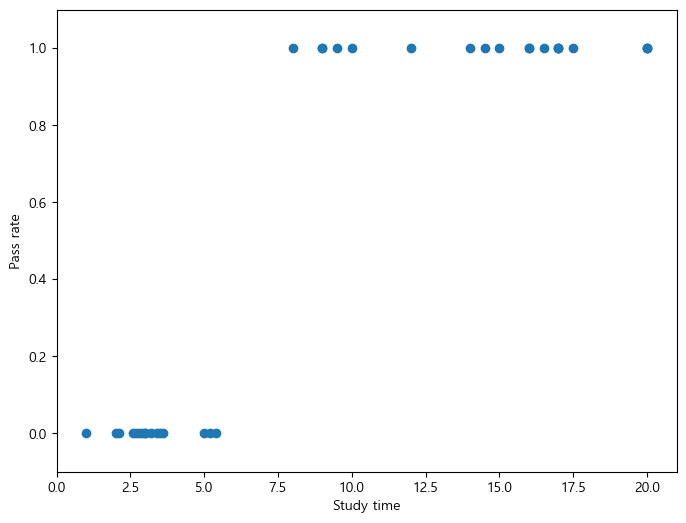

In [221]:
fig = plt.figure(figsize=(8,6))
plt.xlim(0,21)
plt.ylim(-0.1,1.1)

plt.xlabel("Study time")
plt.ylabel("Pass rate")
plt.scatter(X,y)
plt.show()

In [222]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X.reshape(-1,1), y)

print(model.coef_)
print(model.intercept_)

[[1.32952239]]
[-9.1854821]


In [224]:
model.predict(np.array([6,9]).reshape(-1,1))

array([0, 1])

**분기점**

In [225]:
model.predict_proba(np.array([6.9]).reshape(-1,1)) ##6.9시간에서 합격할 확류류

array([[0.50294437, 0.49705563]])

In [230]:
model.predict_proba(np.array([8]).reshape(-1,1))

array([[0.18989432, 0.81010568]])

In [231]:
model.predict_proba(np.array([9]).reshape(-1,1))

array([[0.05840249, 0.94159751]])

In [232]:
model.predict_proba(np.array([11]).reshape(-1,1))

array([[0.0043239, 0.9956761]])

## 학습시간 대 합격의 관계는 S령 커브로 매핑하며 모델이 잘 동작 
선형회귀에서 입출력의 관계를 직선으로 매핑한것과 같이 여기서는 S형 커브로 매핑  
S 커브로는 시그모이드 함수 사용(출력값이 0~1사이의 값으로 매핑)

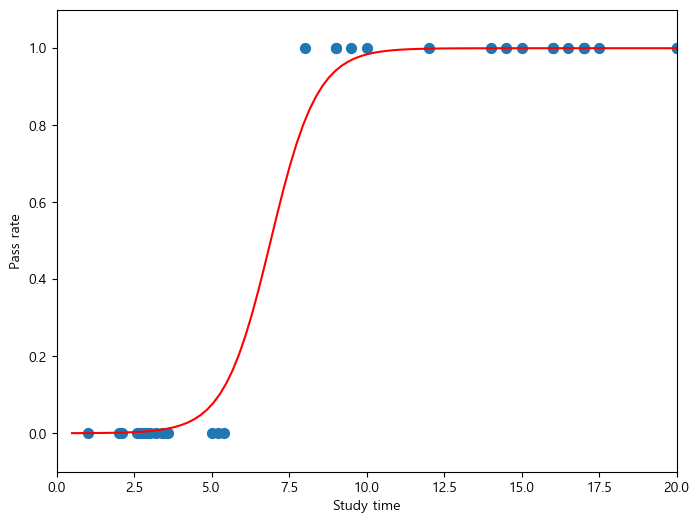

In [233]:
def logreg(z):
    return 1 /(1+np.exp(-z))

fig = plt.figure(figsize=(8,6))
plt.xlim(0, 20)
plt.ylim(-0.1, 1.1)
plt.xlabel('Study time')
plt.ylabel('Pass rate')
plt.scatter(X, y, s=50)

XX = np.linspace(0.5,21, 100)
yy = logreg(model.coef_*XX + model.intercept_)[0]
plt.plot(XX, yy, c='r')

## 파라미터 a와 b의 효과
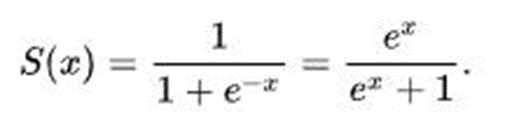
-x => -(ax+b)

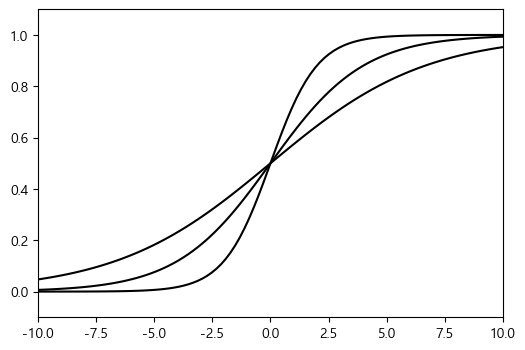

In [234]:
def logreg(z):
    return 1 /(1+np.exp(-z))

fig = plt.figure(figsize=(6,4))
plt.xlim(-10, 10)
plt.ylim(-0.1, 1.1)
a_list = [0.3, 0.5, 1]
b_list = [0]
XX = np.linspace(-10, 10, 100)
for a in a_list:
    for b in b_list: 
        yy = logreg(a*XX + b)
        plt.plot(XX, yy, c='k')

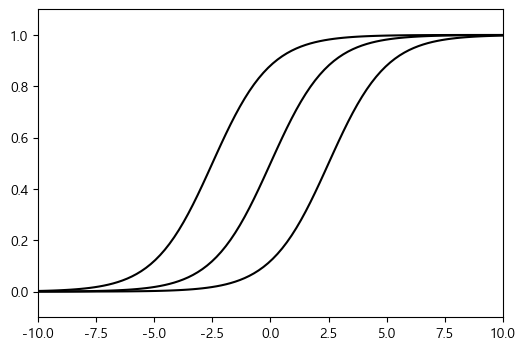

In [236]:
fig = plt.figure(figsize=(6,4))
plt.xlim(-10, 10)
plt.ylim(-0.1, 1.1)
a_list = [0.8]
b_list = [-2,0,2]
XX = np.linspace(-10, 10, 100)
for a in a_list:
    for b in b_list: 
        yy = logreg(a*XX + b)
        plt.plot(XX, yy, c='k')